In [1]:
import zipfile
import os

zip_first_print = "/content/First Print.zip"
zip_second_print = "/content/Second Print.zip"

extract_to = "/content/dataset"

for zip_file in [zip_first_print, zip_second_print]:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

print("Extraction complete!")



Extraction complete!


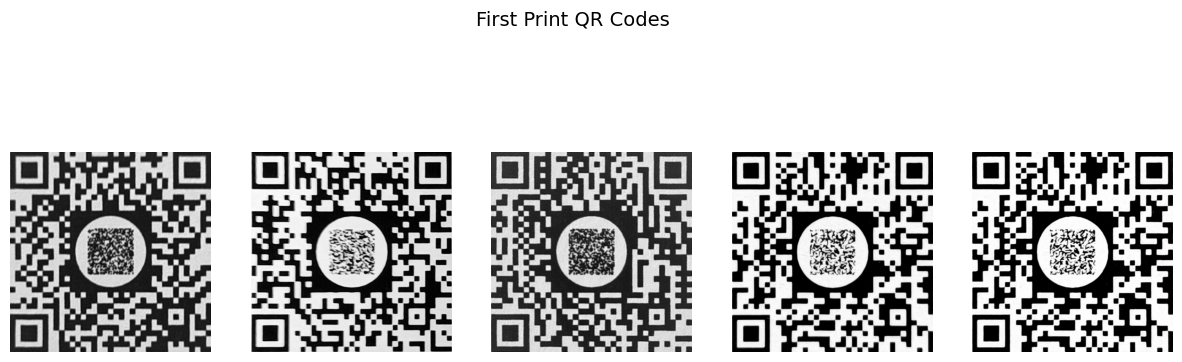

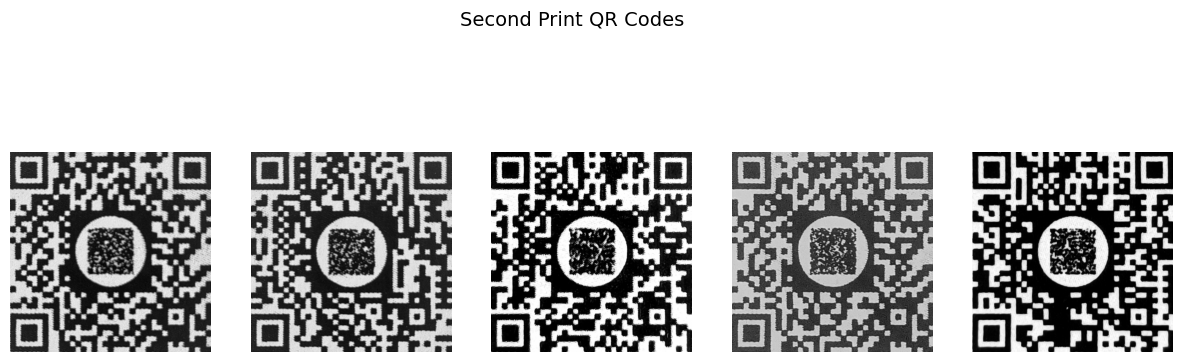

In [2]:
import matplotlib.pyplot as plt
import cv2
import glob

first_print_images = glob.glob(os.path.join(extract_to, "First Print", "*.png"))  # Adjust extension if needed
second_print_images = glob.glob(os.path.join(extract_to, "Second Print", "*.png"))


def show_images(image_list, title, num=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_list[:num]):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
        plt.subplot(1, num, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=14)
    plt.show()


show_images(first_print_images, "First Print QR Codes")
show_images(second_print_images, "Second Print QR Codes")


In [3]:
import cv2
import os
import glob


IMG_SIZE = (224, 224)


dataset_path = "/content/dataset"
first_print_folder = os.path.join(dataset_path, "first_print")
second_print_folder = os.path.join(dataset_path, "second_print")


def preprocess_images(folder):
    image_paths = glob.glob(os.path.join(folder, "*.png"))
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, IMG_SIZE)
        cv2.imwrite(img_path, img)


preprocess_images(first_print_folder)
preprocess_images(second_print_folder)

print("✅ All images resized to", IMG_SIZE, "and converted to grayscale.")




✅ All images resized to (224, 224) and converted to grayscale.


<ipython-input-4-f6cbaaab5a08>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(first_print_features[:, i], label="First Print", shade=True)
<ipython-input-4-f6cbaaab5a08>:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(second_print_features[:, i], label="Second Print", shade=True)


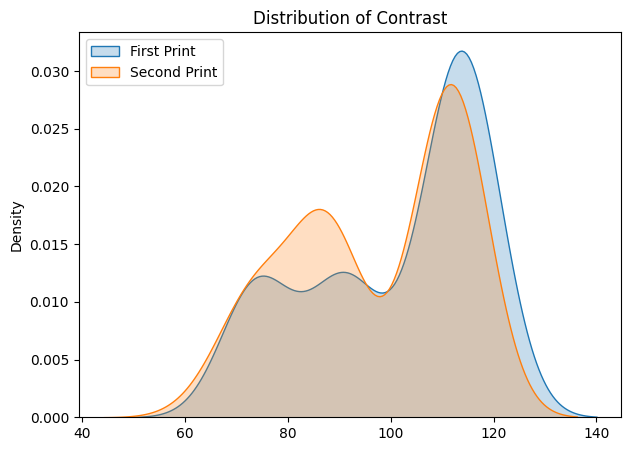

<ipython-input-4-f6cbaaab5a08>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(first_print_features[:, i], label="First Print", shade=True)
<ipython-input-4-f6cbaaab5a08>:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(second_print_features[:, i], label="Second Print", shade=True)


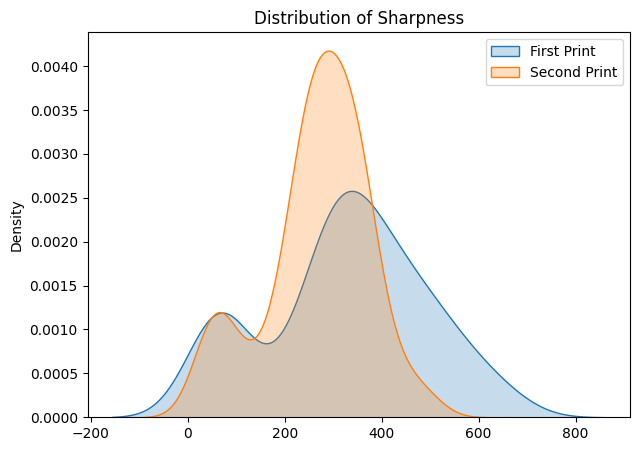

<ipython-input-4-f6cbaaab5a08>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(first_print_features[:, i], label="First Print", shade=True)
<ipython-input-4-f6cbaaab5a08>:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(second_print_features[:, i], label="Second Print", shade=True)


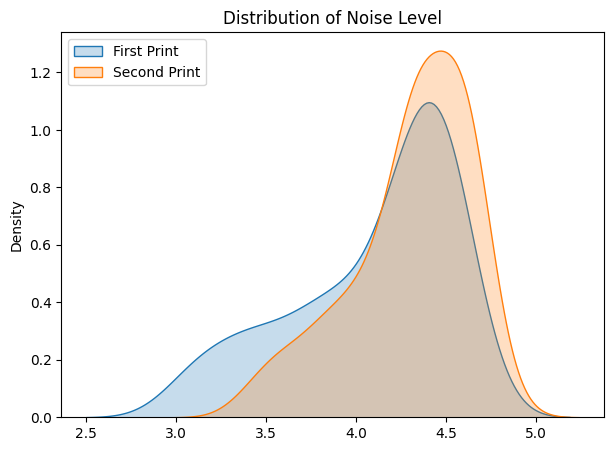

In [4]:
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from scipy.stats import entropy


def calculate_contrast(image):
    return image.std()

def calculate_sharpness(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

def calculate_noise(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 256), density=True)
    return entropy(hist)

def extract_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    contrast = calculate_contrast(img)
    sharpness = calculate_sharpness(img)
    noise = calculate_noise(img)
    return [contrast, sharpness, noise]

first_print_features = np.array([extract_features(img) for img in first_print_images[:100]])  # Limit to 100 for speed
second_print_features = np.array([extract_features(img) for img in second_print_images[:100]])

import seaborn as sns
import matplotlib.pyplot as plt

feature_names = ["Contrast", "Sharpness", "Noise Level"]

for i in range(3):
    plt.figure(figsize=(7, 5))
    sns.kdeplot(first_print_features[:, i], label="First Print", shade=True)
    sns.kdeplot(second_print_features[:, i], label="Second Print", shade=True)
    plt.title(f"Distribution of {feature_names[i]}")
    plt.legend()
    plt.show()


In [5]:
from skimage.feature import local_binary_pattern, hog
import cv2
import numpy as np


radius = 3
n_points = 8 * radius

def calculate_lbp(image):
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    return hist / hist.sum()

def calculate_sobel(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return np.mean(np.abs(sobelx)) + np.mean(np.abs(sobely))

def calculate_hog(image):
    hog_features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True, block_norm="L2-Hys")
    return hog_features[:100]

def extract_local_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    lbp = calculate_lbp(img)
    sobel = calculate_sobel(img)
    hog_feat = calculate_hog(img)
    return np.concatenate((lbp, [sobel], hog_feat))

first_print_local_features = np.array([extract_local_features(img) for img in first_print_images[:100]])
second_print_local_features = np.array([extract_local_features(img) for img in second_print_images[:100]])

print("Local feature extraction complete!")


Local feature extraction complete!


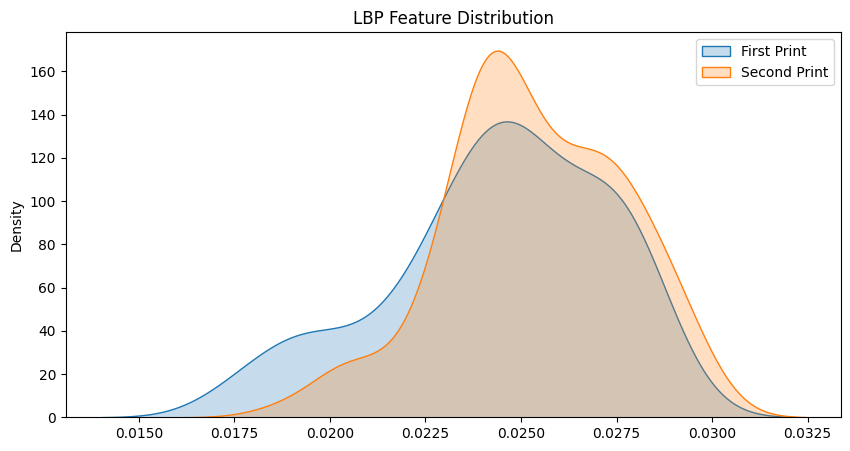

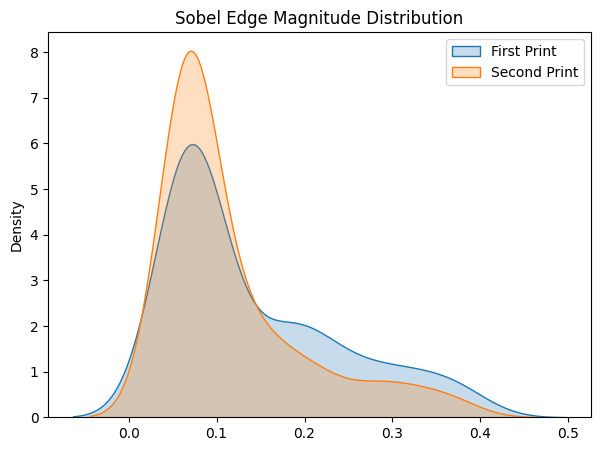

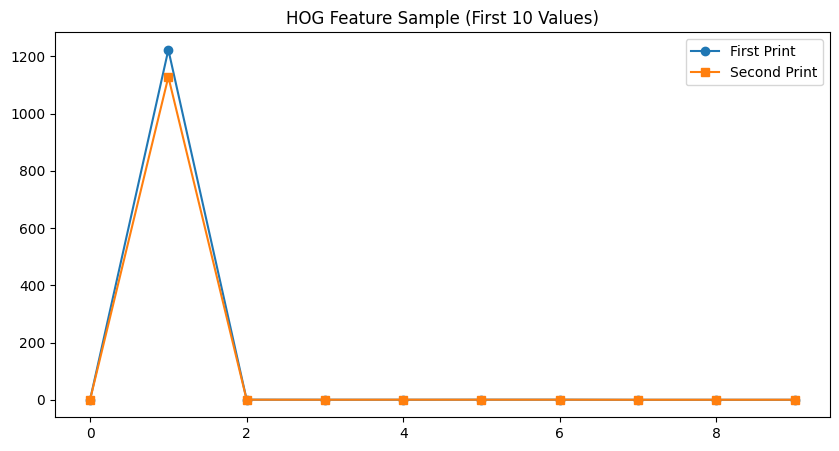

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
sns.kdeplot(first_print_local_features[:, :n_points].mean(axis=1), label="First Print", fill=True)
sns.kdeplot(second_print_local_features[:, :n_points].mean(axis=1), label="Second Print", fill=True)
plt.title("LBP Feature Distribution")
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
sns.kdeplot(first_print_local_features[:, n_points], label="First Print", fill=True)
sns.kdeplot(second_print_local_features[:, n_points], label="Second Print", fill=True)
plt.title("Sobel Edge Magnitude Distribution")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(first_print_local_features[0, n_points + 1 : n_points + 11], label="First Print", marker='o')
plt.plot(second_print_local_features[0, n_points + 1 : n_points + 11], label="Second Print", marker='s')
plt.title("HOG Feature Sample (First 10 Values)")
plt.legend()
plt.show()


In [7]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*(list(resnet.children())[:-1]))
resnet.to(device)
resnet.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def extract_deep_features(image_path):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        features = resnet(img).cpu().numpy().flatten()
    return features

first_print_dl_features = np.array([extract_deep_features(img) for img in first_print_images[:100]])
second_print_dl_features = np.array([extract_deep_features(img) for img in second_print_images[:100]])

print("Deep learning feature extraction complete!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 186MB/s]


Deep learning feature extraction complete!


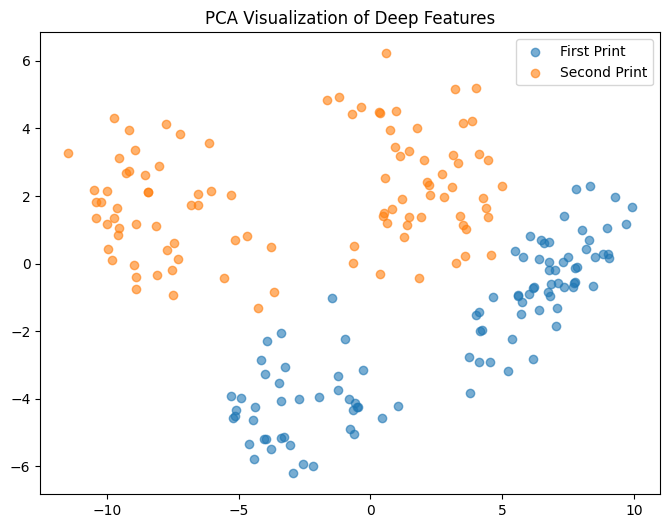

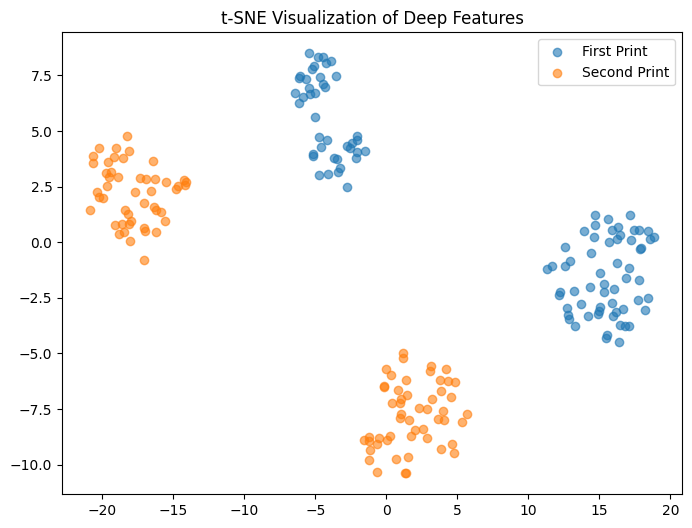

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

deep_features = np.vstack((first_print_dl_features, second_print_dl_features))
labels = np.array([0] * len(first_print_dl_features) + [1] * len(second_print_dl_features))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(deep_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[labels == 0, 0], pca_result[labels == 0, 1], label="First Print", alpha=0.6)
plt.scatter(pca_result[labels == 1, 0], pca_result[labels == 1, 1], label="Second Print", alpha=0.6)
plt.title("PCA Visualization of Deep Features")
plt.legend()
plt.show()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(deep_features)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[labels == 0, 0], tsne_result[labels == 0, 1], label="First Print", alpha=0.6)
plt.scatter(tsne_result[labels == 1, 0], tsne_result[labels == 1, 1], label="Second Print", alpha=0.6)
plt.title("t-SNE Visualization of Deep Features")
plt.legend()
plt.show()


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       0.68      0.89      0.77        19

    accuracy                           0.75        40
   macro avg       0.77      0.76      0.75        40
weighted avg       0.78      0.75      0.75        40

SVM Accuracy: 0.75


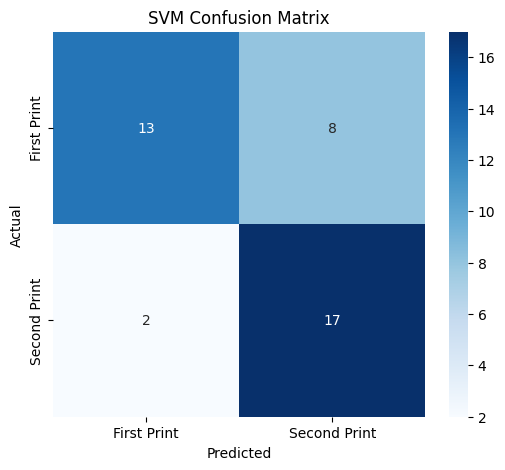

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40

Random Forest Accuracy: 0.925


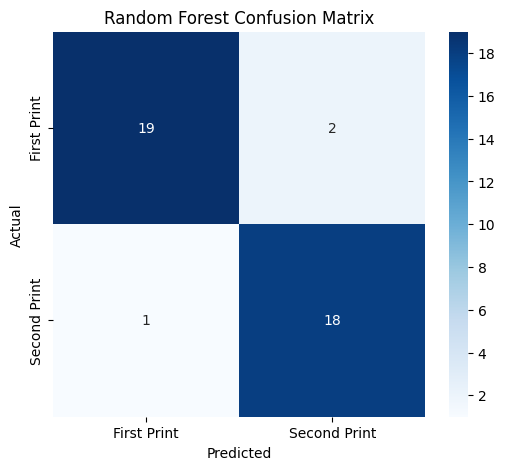

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

X_ml = np.vstack((first_print_features, second_print_features))
X_local = np.vstack((first_print_local_features, second_print_local_features))

X_combined = np.hstack((X_ml, X_local))
y = np.array([0] * len(first_print_features) + [1] * len(second_print_features))

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['First Print', 'Second Print'], yticklabels=['First Print', 'Second Print'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['First Print', 'Second Print'], yticklabels=['First Print', 'Second Print'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


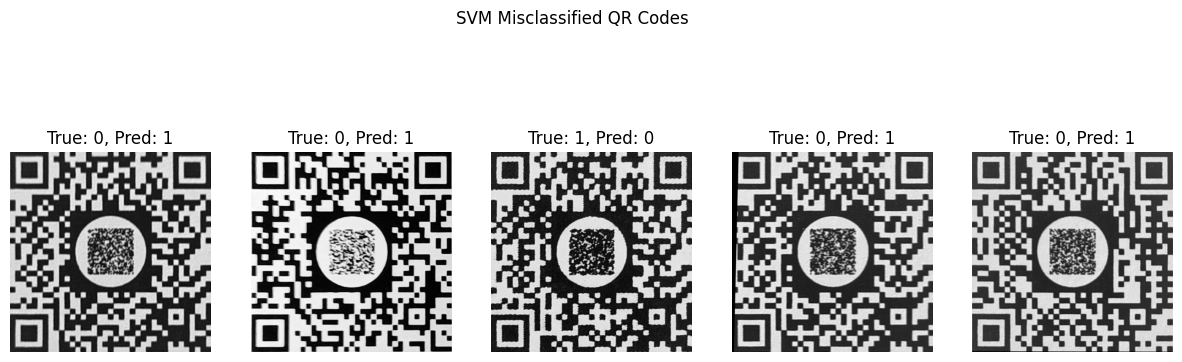

In [11]:

y_true_svm = y_test
y_pred_svm = y_pred_svm


misclassified_idxs = np.where(y_true_svm != y_pred_svm)[0]

num_samples = min(5, len(misclassified_idxs))
plt.figure(figsize=(15, 5))

for i, idx in enumerate(misclassified_idxs[:num_samples]):
    img_path = first_print_images[idx] if y_true_svm[idx] == 0 else second_print_images[idx]  # Get corresponding image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_true_svm[idx]}, Pred: {y_pred_svm[idx]}")
    plt.axis('off')

plt.suptitle("SVM Misclassified QR Codes")
plt.show()


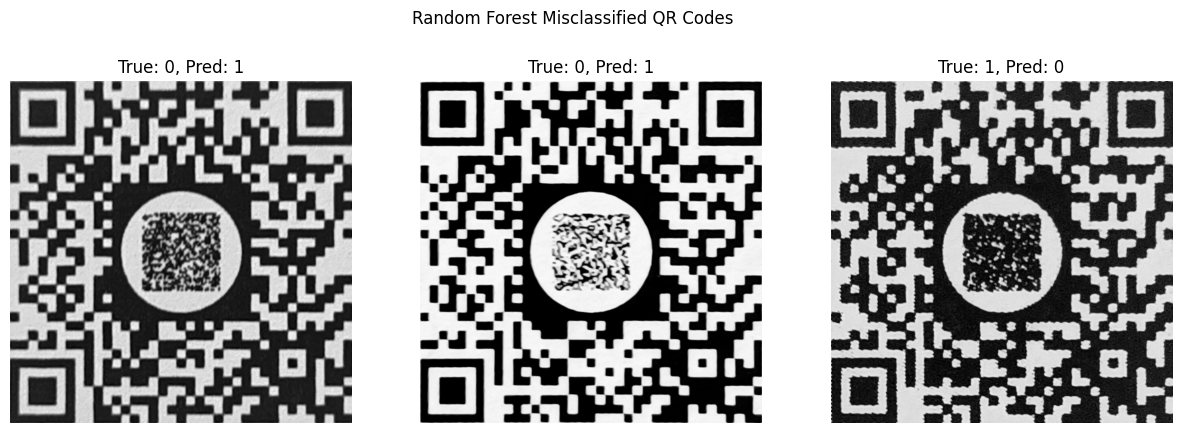

In [12]:

y_true_rf = y_test
y_pred_rf = y_pred_rf

misclassified_idxs = np.where(y_true_rf != y_pred_rf)[0]

num_samples = min(5, len(misclassified_idxs))
plt.figure(figsize=(15, 5))

for i, idx in enumerate(misclassified_idxs[:num_samples]):
    img_path = first_print_images[idx] if y_true_rf[idx] == 0 else second_print_images[idx]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_true_rf[idx]}, Pred: {y_pred_rf[idx]}")
    plt.axis('off')

plt.suptitle("Random Forest Misclassified QR Codes")
plt.show()


Epoch [1/10], Loss: 0.7084
Epoch [2/10], Loss: 0.5737
Epoch [3/10], Loss: 0.4122
Epoch [4/10], Loss: 0.2864
Epoch [5/10], Loss: 0.1821
Epoch [6/10], Loss: 0.1077
Epoch [7/10], Loss: 0.0614
Epoch [8/10], Loss: 0.0393
Epoch [9/10], Loss: 0.0225
Epoch [10/10], Loss: 0.0129
MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

MLP Accuracy: 1.0


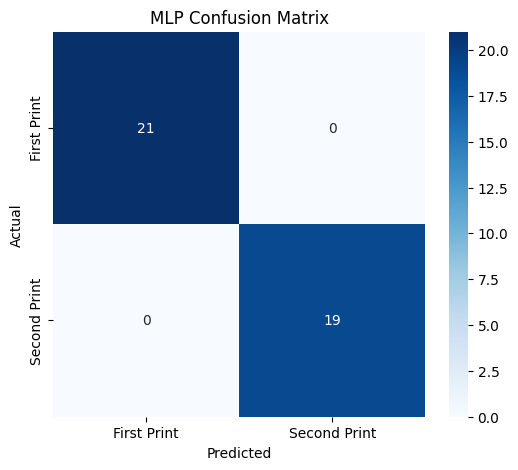

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_dl = np.vstack((first_print_dl_features, second_print_dl_features))
y_dl = np.array([0] * len(first_print_dl_features) + [1] * len(second_print_dl_features))

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.2, random_state=42)

X_train_dl_tensor = torch.tensor(X_train_dl, dtype=torch.float32)
y_train_dl_tensor = torch.tensor(y_train_dl, dtype=torch.long)
X_test_dl_tensor = torch.tensor(X_test_dl, dtype=torch.float32)
y_test_dl_tensor = torch.tensor(y_test_dl, dtype=torch.long)

train_dataset = TensorDataset(X_train_dl_tensor, y_train_dl_tensor)
test_dataset = TensorDataset(X_test_dl_tensor, y_test_dl_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_size=X_train_dl.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")

model.eval()
y_pred_dl = []
y_true_dl = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred_dl.extend(predicted.cpu().numpy())
        y_true_dl.extend(y_batch.cpu().numpy())

from sklearn.metrics import classification_report, accuracy_score
print("MLP Classification Report:\n", classification_report(y_true_dl, y_pred_dl))
print("MLP Accuracy:", accuracy_score(y_true_dl, y_pred_dl))

conf_matrix = confusion_matrix(y_true_dl, y_pred_dl)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['First Print', 'Second Print'], yticklabels=['First Print', 'Second Print'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP Confusion Matrix")
plt.show()


In [14]:

y_true_dl = np.array(y_true_dl)
y_pred_dl = np.array(y_pred_dl)

misclassified_idxs = np.where(y_true_dl != y_pred_dl)[0]

num_samples = min(5, len(misclassified_idxs))
plt.figure(figsize=(15, 5))

for i, idx in enumerate(misclassified_idxs[:num_samples]):
    img_path = first_print_images[idx] if y_true_dl[idx] == 0 else second_print_images[idx]  # Get corresponding image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_true_dl[idx]}, Pred: {y_pred_dl[idx]}")
    plt.axis('off')

plt.suptitle("MLP Misclassified QR Codes")
plt.show()


<Figure size 1500x500 with 0 Axes>

In [15]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = ImageFolder(root="/content/dataset", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.ReLU()(self.fc1(x))
        return self.fc2(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    cnn_model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")

print("CNN Training Complete!")


Epoch [1/10], Loss: 1.0406
Epoch [2/10], Loss: 0.4814
Epoch [3/10], Loss: 0.3479
Epoch [4/10], Loss: 0.2322
Epoch [5/10], Loss: 0.1491
Epoch [6/10], Loss: 0.1077
Epoch [7/10], Loss: 0.0583
Epoch [8/10], Loss: 0.0418
Epoch [9/10], Loss: 0.0309
Epoch [10/10], Loss: 0.0188
CNN Training Complete!


CNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



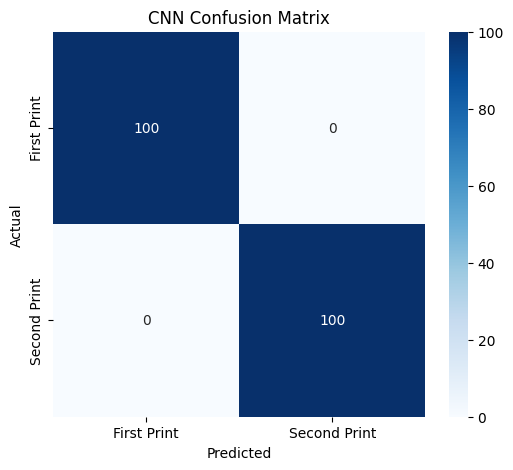

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

test_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)  # Using same dataset since we didn't split

cnn_model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print("CNN Classification Report:\n", classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['First Print', 'Second Print'], yticklabels=['First Print', 'Second Print'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Confusion Matrix")
plt.show()


In [17]:

cnn_model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

correct = (y_true == y_pred).sum()
total = len(y_true)
print(f"Recalculated CNN Accuracy: {correct / total:.2%}")

misclassified_idxs = np.where(y_true != y_pred)[0]

num_samples = min(5, len(misclassified_idxs))
plt.figure(figsize=(15, 5))

for i, idx in enumerate(misclassified_idxs[:num_samples]):
    img_path, label = train_dataset.samples[idx]
    img = Image.open(img_path).convert('L')

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {label}, Pred: {y_pred[idx]}")
    plt.axis('off')

plt.suptitle("CNN Misclassified QR Codes")
plt.show()


Recalculated CNN Accuracy: 100.00%


<Figure size 1500x500 with 0 Axes>